## News Mood
### Observations:
1. All 5 Media Outles have neutral sentiment in most of their tweets
2. CBS appears to have the widest range of sentiment 
3. BBC World has the lowest sentiment score of all 5 media outlets

In [2]:
# Dependencies
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import datetime
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Twitter API Keys. Place your keys here.
consumer_key = "LqZehyBrSOwzkGx7Cpwx4mhsK"
consumer_secret = "k5taBhrfGgYNQ8ecW3JTbXibCb32f5kC375C8NF3CqAr7javKB"
access_token = "133594066-M9KUh9H6JoDyva5bkTTRt8ojaZ9dCafHc9lazW1k"
access_token_secret = "PMtstoGy0SR0yw4YqlQrge8ZRkpfy3aBeznE6WVsN8FC5"

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target User Account
target_users = ['@nytimes','@bbcworld','@CBSNews','@CNNbrk','@FoxNews']

# Lists for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
# Sentiment data frame to struture CSV file
sentiments_df = pd.DataFrame()

#List to calculate average sentiment 
news1 = []
news2 = []
news3 = []
news4 = []
news5 = []

In [13]:
for news in target_users:
    counter = 1       #counter for 'tweets ago'
    pagecounter = 1   #counter for pagination
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        public_tweets = api.user_timeline(news, page = pagecounter)
        # Loop through all tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])["compound"]
            pos = analyzer.polarity_scores(tweet['text'])["pos"]
            neu = analyzer.polarity_scores(tweet['text'])["neu"]
            neg = analyzer.polarity_scores(tweet['text'])["neg"]
            # to gather average sentiment while looping
            if news == target_users[0]:
                news1.append(compound)
            if news == target_users[1]:
                news2.append(compound)
            if news == target_users[2]:
                news3.append(compound)
            if news == target_users[3]:
                news4.append(compound)
            if news == target_users[4]:
                news5.append(compound)
                
            sentiments_df = sentiments_df.append(pd.DataFrame({"Media": news,"Date": tweet["created_at"], 
                                                               "Compound": compound,"Positive": pos, "Neutral":neu,
                                                               "Negative": neg, "Tweet": tweet['text']
                                                               ,"Tweets Ago": counter}, index=[0]))
            counter = counter + 1 
            pagecounter = pagecounter + 1 
            
sentiments_df.head()   

,Compound,Date,Media,Negative,Neutral,Positive,Tweet,Tweets Ago
0,-0.4215,Sun Jan 14 01:49:39 +0000 2018,@nytimes,0.291,0.581,0.128,False Missile Warning in Hawaii Adds to Scruti...,1
0,-0.5719,Sun Jan 14 01:33:31 +0000 2018,@nytimes,0.251,0.749,0.000,Mark Wahlberg and Agency Will Donate $2 Millio...,2
0,0.3415,Sun Jan 14 01:24:34 +0000 2018,@nytimes,0.000,0.833,0.167,The kind of comforting meal to eat on a cold w...,3
0,0.0000,Sun Jan 14 01:06:14 +0000 2018,@nytimes,0.000,1.000,0.000,A look inside one of America's last pencil fac...,4
0,0.4939,Sun Jan 14 00:50:27 +0000 2018,@nytimes,0.000,0.714,0.286,On Dessert: How Rice Pudding Gave Me Courage h...,5


In [14]:
# reset column order, push to csv, display head() to verify 
sentiments_df = sentiments_df[["Date","Media","Tweet","Compound","Positive","Negative","Neutral","Tweets Ago"]]
sentiments_df.to_csv('NewsSentiments.csv', index=False)
sentiments_df.head()

,Date,Media,Tweet,Compound,Positive,Negative,Neutral,Tweets Ago
0,Sun Jan 14 01:49:39 +0000 2018,@nytimes,False Missile Warning in Hawaii Adds to Scruti...,-0.4215,0.128,0.291,0.581,1
0,Sun Jan 14 01:33:31 +0000 2018,@nytimes,Mark Wahlberg and Agency Will Donate $2 Millio...,-0.5719,0.000,0.251,0.749,2
0,Sun Jan 14 01:24:34 +0000 2018,@nytimes,The kind of comforting meal to eat on a cold w...,0.3415,0.167,0.000,0.833,3
0,Sun Jan 14 01:06:14 +0000 2018,@nytimes,A look inside one of America's last pencil fac...,0.0000,0.000,0.000,1.000,4
0,Sun Jan 14 00:50:27 +0000 2018,@nytimes,On Dessert: How Rice Pudding Gave Me Courage h...,0.4939,0.286,0.000,0.714,5


In [15]:
# Create list of average sentiment of all outlets
comp_avg = [np.mean(news1),np.mean(news2),np.mean(news3),np.mean(news4),np.mean(news5)]

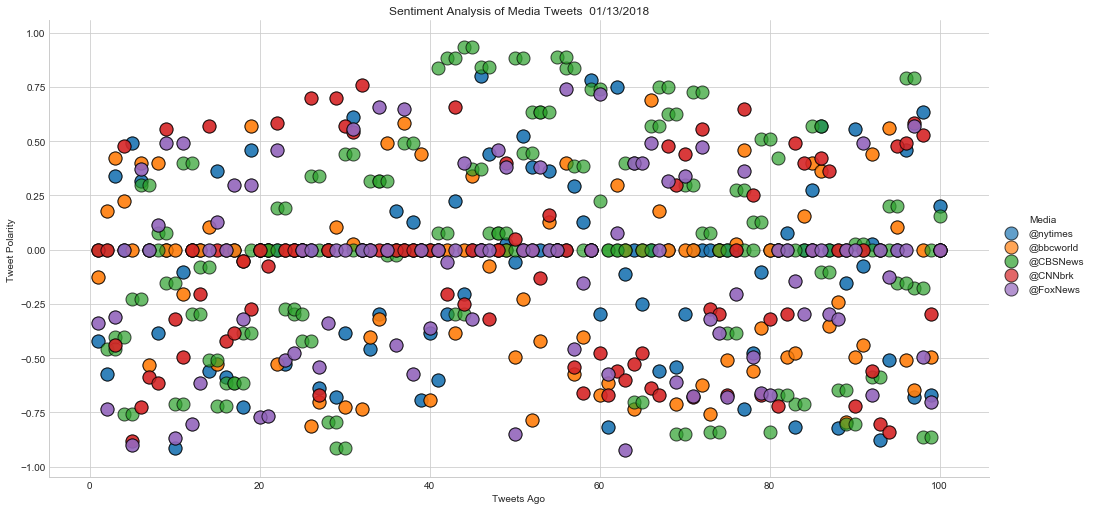

In [16]:
# Create Scatter plot of all tweets
sns.lmplot(x="Tweets Ago", 
           y="Compound", 
           data=sentiments_df,
           fit_reg=False, 
           hue= 'Media',
           size =7,
           aspect =2,
           scatter_kws={"marker": "o", "alpha":.7,"s":170,"edgecolor":"black"})
sns.set_style('whitegrid')
plt.title("Sentiment Analysis of Media Tweets  "+datetime.datetime.now().strftime("%m/%d/%Y"))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("MediaScatter.png")
plt.show()

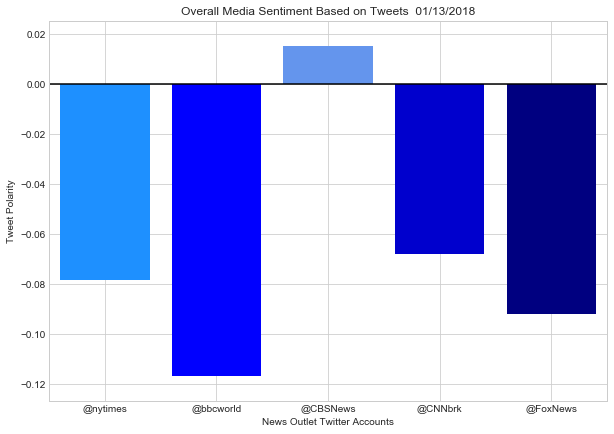

In [22]:
#Create Bar Plot of Average Sentiment
height = comp_avg 
bars = target_users 
y_pos = np.arange(len(bars))
plt.figure(figsize=(10,7))
plt.bar(y_pos, height,
         color=['dodgerblue','blue', 'cornflowerblue', 'mediumblue', 'navy'])
plt.xticks(y_pos, bars)
plt.xlim(-.5, len(bars)-.5) 
plt.ylim(min(height)-.01, max(height)+.01)
plt.title("Overall Media Sentiment Based on Tweets  "+ datetime.datetime.now().strftime("%m/%d/%Y"))
plt.xlabel("News Outlet Twitter Accounts")
plt.ylabel("Tweet Polarity")
sns.set_style('whitegrid')
plt.savefig("MediaBars.png")
plt.hlines(0, -1, 10)
plt.show()
